<a href="https://colab.research.google.com/github/xrjiang83/learn_d2l/blob/master/Learn_D2L_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mxnet

     |████████████████████████████████| 25.4MB 90kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [6]:
from mxnet import nd
from time import time
a = nd.ones(shape=1000)
b = nd.ones(shape=1000)
c = nd.zeros(shape=1000)
start1 = time()
for i in range(1000) : 
  c[i] = a[i] + b[i]
print(time() - start1)
start2 = time()
d = a + b
print(time() - start2)

0.1377696990966797
0.0002586841583251953


In [0]:
from IPython import display
from matplotlib import pyplot as plt
from mxnet import autograd, nd
import random
# randomly generate a dataset
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = true_w[0] * features[:,0] + true_w[1] * features[:,1] + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)

In [0]:
def use_svg_display() : 
  display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)) : 
  use_svg_display()
  plt.rcParams['figure.figsize'] = figsize


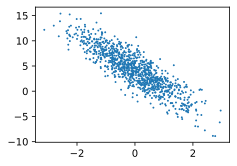

In [9]:
set_figsize()
plt.scatter(features[:,1].asnumpy(), labels.asnumpy(), 1); # add the semicolon to show the figure only

In [0]:
# 本函数已保存在d2lzh包中方便以后使用
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # 样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j), labels.take(j)  # take函数根据索引返回对应元素

In [0]:
w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
b = nd.zeros(shape=(1,))
w.attach_grad()
b.attach_grad()

In [0]:
def linreg(X, w, b):  # 本函数已保存在d2lzh包中方便以后使用
    return nd.dot(X, w) + b

In [0]:
def squared_loss(y_hat, y):  # 本函数已保存在d2lzh包中方便以后使用
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [0]:
def sgd(params, lr, batch_size):  # 本函数已保存在d2lzh包中方便以后使用
    for param in params:
        param[:] = param - lr * param.grad / batch_size